In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.rc = {'figure.figsize': (5.0, 4.0)}

# Daten laden

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../udemy/Kursmaterialien/data/Diamonds/diamonds.csv.bz2")
# print(len(df))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Punktdiagramme

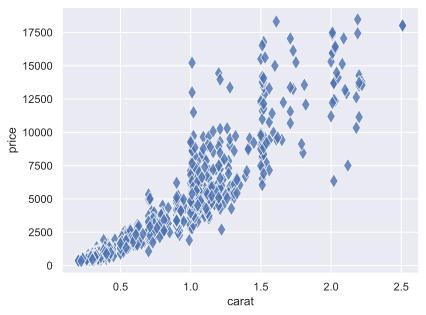

In [4]:
df = df.sample(1000)

sns.set_theme()

sns.scatterplot(x=df["carat"], y=df["price"], alpha = 0.8, marker="d", s = 100)
plt.show()

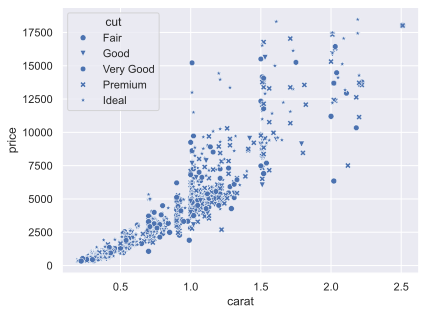

In [5]:
sns.scatterplot(
    x=df["carat"], 
    y=df["price"], 
    style=df["cut"],
    style_order=["Fair", "Good", "Very Good", "Premium", "Ideal"],
    markers=["o", "v", "8", "X", "*"])

plt.show()

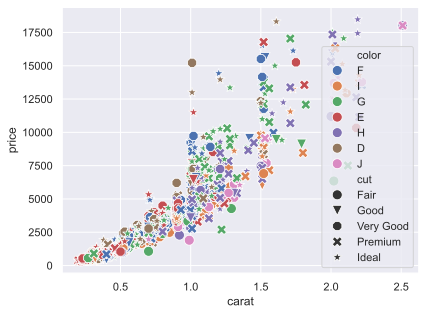

In [6]:
df = df.sample(1000)

sns.scatterplot(
    data=df,
    x="carat",
    y="price",
    style="cut",
    style_order=["Fair", "Good", "Very Good", "Premium", "Ideal"],
    markers=["o", "v", "8", "X", "*"],
    hue="color",
    s=100
)
plt.show()

# Labels

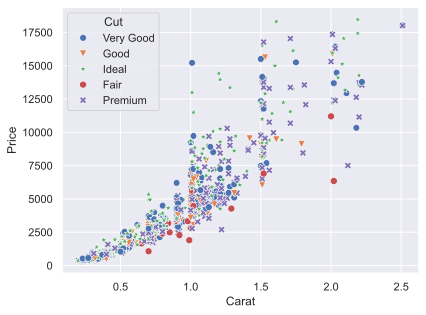

In [7]:
ax = sns.scatterplot(
    data=df,
    x="carat",
    y="price",
    style="cut",
    style_order=["Fair", "Good", "Very Good", "Premium", "Ideal"],
    markers=["o", "v", "8", "X", "*"],
    hue="cut",
    s=50,
)
ax.set_xlabel("Carat")
ax.set_ylabel("Price")
legend = ax.legend(title="Cut", loc="upper left")
#legend.texts[0].set_text("custom...")

plt.show()

# Balkendiagramme

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
28882,0.32,Very Good,F,SI1,63.2,55.0,684,4.40,4.37,2.77
5517,1.00,Good,I,SI1,63.8,58.0,3850,6.28,6.32,4.02
52720,0.74,Ideal,F,SI2,60.6,57.0,2555,5.88,5.84,3.55
45247,0.65,Fair,I,VS2,65.1,55.6,1659,5.44,5.50,3.56
44654,0.29,Very Good,G,VVS1,62.0,58.0,522,4.19,4.23,2.61


In [9]:
df_color = df.groupby("color").agg(count = ("cut", len))
df_color.head()

,count
color,
D,130
E,182
F,188
G,199
H,150


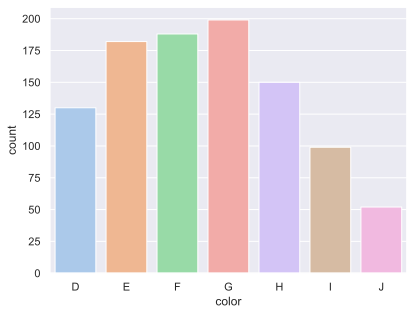

In [10]:
sns.barplot(x=df_color.index, y=df_color["count"], palette="pastel", hue=df_color.index)
sns.set_theme(style="white")
plt.show()

## Mehrere Balken nebeneinander in einem Diagramm

In [11]:
df_cut_color = df.groupby(["cut", "color"]).agg(avg_price = ("price", "mean")).reset_index()
df_cut_color.head()

,cut,color,avg_price
0,Fair,D,3912.333333
1,Fair,E,1737.600000
2,Fair,F,1959.400000
3,Fair,G,3260.250000
4,Fair,H,4967.142857


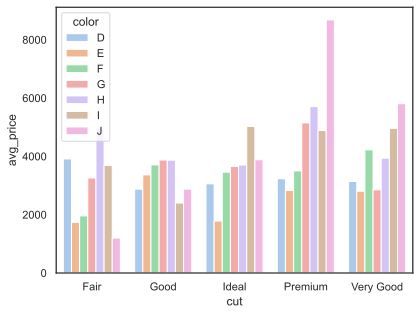

In [12]:
sns.barplot(x="cut", y="avg_price", hue="color", data=df_cut_color, palette="pastel")
plt.show()

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
28882,0.32,Very Good,F,SI1,63.2,55.0,684,4.40,4.37,2.77
5517,1.00,Good,I,SI1,63.8,58.0,3850,6.28,6.32,4.02
52720,0.74,Ideal,F,SI2,60.6,57.0,2555,5.88,5.84,3.55
45247,0.65,Fair,I,VS2,65.1,55.6,1659,5.44,5.50,3.56
44654,0.29,Very Good,G,VVS1,62.0,58.0,522,4.19,4.23,2.61


In [14]:
df_grouped = df.groupby("color").agg(avgX = ("x", "mean"), 
                                    avgY = ("y", "mean"),
                                    avgZ = ("z", "mean")).reset_index().melt(id_vars="color")
df_grouped.head()

,color,variable,value
0,D,avgX,5.453462
1,E,avgX,5.199121
2,F,avgX,5.631915
3,G,avgX,5.668794
4,H,avgX,6.023533


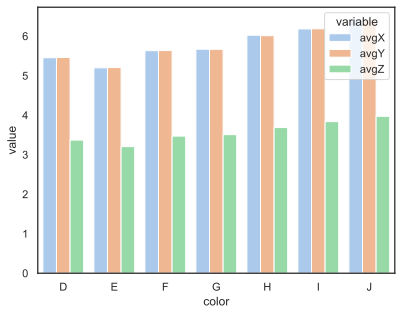

In [15]:
sns.barplot(x="color", y="value", hue="variable", data=df_grouped, palette="pastel")
plt.show()

# Histogramm

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
28882,0.32,Very Good,F,SI1,63.2,55.0,684,4.40,4.37,2.77
5517,1.00,Good,I,SI1,63.8,58.0,3850,6.28,6.32,4.02
52720,0.74,Ideal,F,SI2,60.6,57.0,2555,5.88,5.84,3.55
45247,0.65,Fair,I,VS2,65.1,55.6,1659,5.44,5.50,3.56
44654,0.29,Very Good,G,VVS1,62.0,58.0,522,4.19,4.23,2.61


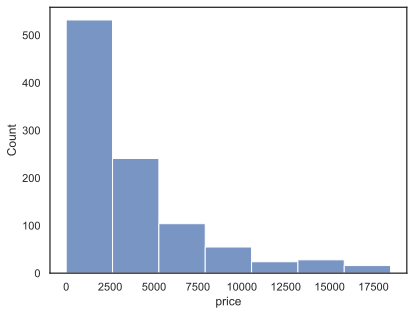

In [17]:
sns.histplot(data = df, x="price", binwidth=2500, binrange=(0, df["price"].max()))
plt.show()

# Jointplot

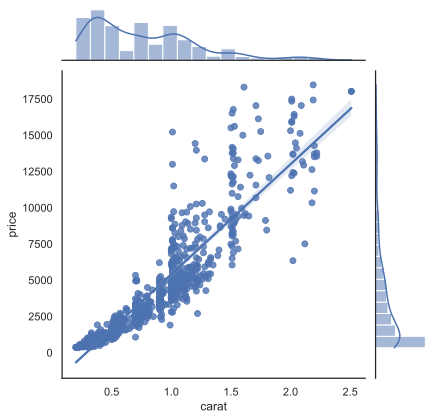

In [24]:
sns.jointplot(data = df, x = df["carat"], y=df["price"], kind="reg")
plt.show()